# Activity 1

In [1]:
class Node:
    def __init__(self, state, parent=None, actions=None):
        self.state = state
        self.parent = parent
        self.actions = actions if actions else []

graph = {
    'A': Node('A', actions=['B', 'E', 'C']),
    'B': Node('B', actions=['D', 'E', 'A']),
    'C': Node('C', actions=['A', 'F', 'G']),
    'D': Node('D', actions=['B', 'E']),
    'E': Node('E', actions=['A', 'B', 'D']),
    'F': Node('F', actions=['C']),
    'G': Node('G', actions=['C'])
}

def dfs(start, goal):
    stack, visited = [start], set()
    while stack:
        current = stack.pop()
        if current in visited:
            continue
        visited.add(current)
        if current == goal:
            return reconstruct_path(graph, start, goal)
        for neighbor in reversed(graph[current].actions):
            if neighbor not in visited:
                graph[neighbor].parent = current
                stack.append(neighbor)
    return []

def reconstruct_path(graph, start, goal):
    path = []
    while goal is not None:
        path.append(goal)
        goal = graph[goal].parent
    return path[::-1]

solution = dfs('A', 'D')
print(solution)


['A', 'B', 'D']


# Activity 1(Using Networkx)

DFS Path: ['A', 'B', 'D']


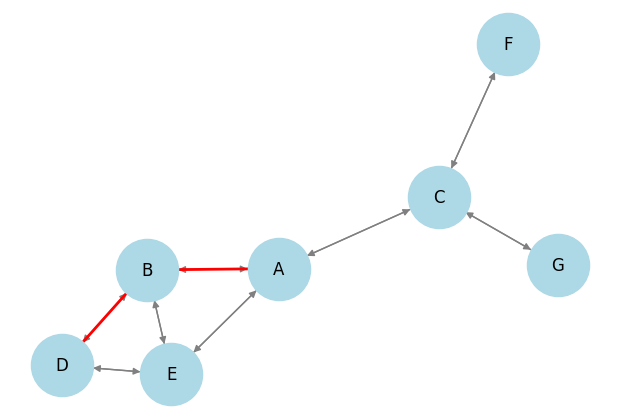

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

class GraphTraversal:
    def __init__(self):
        self.graph = {
            'A': ['B', 'E', 'C'],
            'B': ['D', 'E', 'A'],
            'C': ['A', 'F', 'G'],
            'D': ['B', 'E'],
            'E': ['A', 'B', 'D'],
            'F': ['C'],
            'G': ['C']
        }
        self.G = nx.DiGraph()
        for node, neighbors in self.graph.items():
            for neighbor in neighbors:
                self.G.add_edge(node, neighbor)

    def dfs(self, start, goal):
        stack = [start]
        explored = []
        parent = {start: None}
        
        while stack:
            node = stack.pop()
            if node == goal:
                return self.reconstruct_path(parent, start, goal)
            if node not in explored:
                explored.append(node)
                for neighbor in reversed(self.graph[node]):
                    if neighbor not in explored:
                        stack.append(neighbor)
                        parent[neighbor] = node
        return None

    def reconstruct_path(self, parent, start, goal):
        path = []
        while goal is not None:
            path.append(goal)
            goal = parent[goal]
        return path[::-1]

    def draw_graph(self, path=None):
        plt.figure(figsize=(6, 4))
        pos = nx.spring_layout(self.G)
        
    
        nx.draw(self.G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=2000, font_size=12)
        
        if path:
            edges_in_path = [(path[i], path[i+1]) for i in range(len(path)-1)]
            nx.draw_networkx_edges(self.G, pos, edgelist=edges_in_path, edge_color='red', width=2)
        
        plt.show()

traversal = GraphTraversal()
path = traversal.dfs('A', 'D')
print("DFS Path:", path)
traversal.draw_graph(path)


# Activity 2

Final path: ['D', 'B', 'A', 'C']
Explored nodes: ['D', 'B', 'E', 'E', 'A', 'A', 'B', 'A', 'E', 'C']


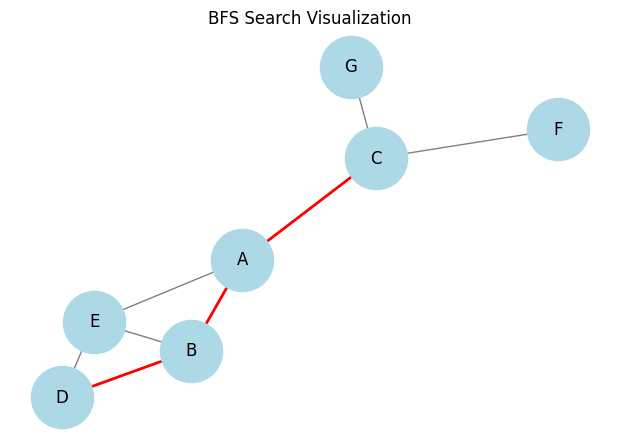

In [5]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque

def bfs_path(graph, start, goal):
    queue = deque([(start, [start])])
    explored = []
    while queue:
        node, path = queue.popleft()
        explored.append(node)
        if node == goal:
            return path, explored
        for neighbor in graph[node]:
            if neighbor not in path:
                queue.append((neighbor, path + [neighbor]))
    return None, explored

def draw_graph(graph, path, explored):
    G = nx.Graph(graph)
    pos = nx.spring_layout(G)
    plt.figure(figsize=(6, 4))
    
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=2000, font_size=12)
    
    path_edges = list(zip(path, path[1:])) if path else []
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=2)
    
    plt.title("BFS Search Visualization")
    plt.show()

graph = {
    'A': ['B', 'E', 'C'],
    'B': ['D', 'E', 'A'],
    'C': ['A', 'F', 'G'],
    'D': ['B', 'E'],
    'E': ['A', 'B', 'D'],
    'F': ['C'],
    'G': ['C']
}

initial_state = 'D'
goal_state = 'C'
final_path, explored_nodes = bfs_path(graph, initial_state, goal_state)
print("Final path:", final_path)
print("Explored nodes:", explored_nodes)
draw_graph(graph, final_path, explored_nodes)


# Task 1

DFS Path: ['Arad', 'Timisoara', 'Lugoj', 'Mehadia', 'Drobeta', 'Craiova', 'Pitesti', 'Bucharest']


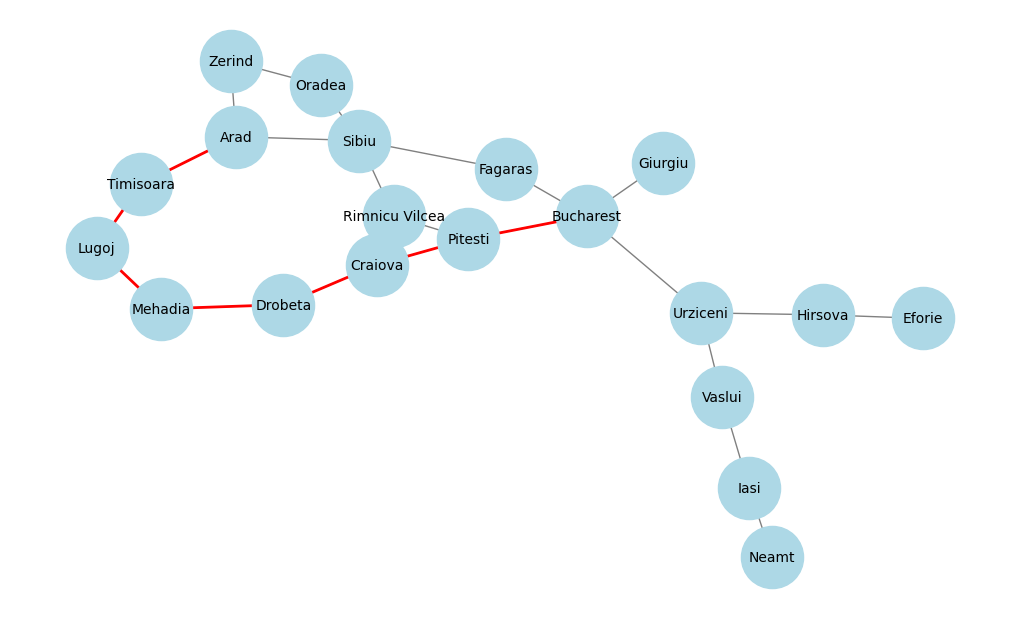

In [6]:
import networkx as nx
import matplotlib.pyplot as plt

class RomaniaGraph:
    def __init__(self):
        self.graph = {
            'Arad': {'Zerind': 75, 'Sibiu': 140, 'Timisoara': 118},
            'Zerind': {'Oradea': 71, 'Arad': 75},
            'Oradea': {'Zerind': 71, 'Sibiu': 151},
            'Sibiu': {'Oradea': 151, 'Arad': 140, 'Fagaras': 99, 'Rimnicu Vilcea': 80},
            'Timisoara': {'Arad': 118, 'Lugoj': 111},
            'Lugoj': {'Timisoara': 111, 'Mehadia': 70},
            'Mehadia': {'Lugoj': 70, 'Drobeta': 75},
            'Drobeta': {'Mehadia': 75, 'Craiova': 120},
            'Craiova': {'Drobeta': 120, 'Rimnicu Vilcea': 146, 'Pitesti': 138},
            'Rimnicu Vilcea': {'Sibiu': 80, 'Craiova': 146, 'Pitesti': 97},
            'Fagaras': {'Sibiu': 99, 'Bucharest': 211},
            'Pitesti': {'Rimnicu Vilcea': 97, 'Craiova': 138, 'Bucharest': 101},
            'Bucharest': {'Fagaras': 211, 'Pitesti': 101, 'Giurgiu': 90, 'Urziceni': 85},
            'Giurgiu': {'Bucharest': 90},
            'Urziceni': {'Bucharest': 85, 'Vaslui': 142, 'Hirsova': 98},
            'Hirsova': {'Urziceni': 98, 'Eforie': 86},
            'Eforie': {'Hirsova': 86},
            'Vaslui': {'Iasi': 92, 'Urziceni': 142},
            'Iasi': {'Vaslui': 92, 'Neamt': 87},
            'Neamt': {'Iasi': 87}
        }
        
        self.G = nx.Graph()
        for city, neighbors in self.graph.items():
            for neighbor, cost in neighbors.items():
                self.G.add_edge(city, neighbor, weight=cost)

    def dfs(self, start, goal):
        stack = [start]
        explored = set()
        parent = {start: None}

        while stack:
            node = stack.pop()
            if node == goal:
                return self.reconstruct_path(parent, start, goal)
            if node not in explored:
                explored.add(node)
                for neighbor in self.graph[node]:
                    if neighbor not in explored:
                        stack.append(neighbor)
                        parent[neighbor] = node
        return None

    def reconstruct_path(self, parent, start, goal):
        path = []
        while goal is not None:
            path.append(goal)
            goal = parent[goal]
        return path[::-1]

    def draw_graph(self, path=None):
        plt.figure(figsize=(10, 6))
        pos = nx.spring_layout(self.G, seed=42)
        
        nx.draw(self.G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=2000, font_size=10)
        
        if path:
            edges_in_path = [(path[i], path[i+1]) for i in range(len(path)-1)]
            nx.draw_networkx_edges(self.G, pos, edgelist=edges_in_path, edge_color='red', width=2)
        
        plt.show()


romania_map = RomaniaGraph()

path = romania_map.dfs('Arad', 'Bucharest')
print("DFS Path:", path)

romania_map.draw_graph(path)


# Activity 2

In [7]:
DIRECTIONS = [(-1, 0), (1, 0), (0, -1), (0, 1), 
              (-1, -1), (-1, 1), (1, -1), (1, 1)]

class Boggle:
    def __init__(self, board, dictionary):
        self.board = board
        self.dictionary = set(dictionary)
        self.found_words = set()
        self.rows = len(board)
        self.cols = len(board[0])

    def is_valid(self, x, y, visited):
        return 0 <= x < self.rows and 0 <= y < self.cols and (x, y) not in visited

    def dfs(self, x, y, word, visited):
        if word in self.dictionary:
            self.found_words.add(word)

        for dx, dy in DIRECTIONS:
            nx, ny = x + dx, y + dy
            if self.is_valid(nx, ny, visited):
                visited.add((nx, ny))
                self.dfs(nx, ny, word + self.board[nx][ny], visited)
                visited.remove((nx, ny))  

    def find_words(self):
        for i in range(self.rows):
            for j in range(self.cols):
                self.dfs(i, j, self.board[i][j], {(i, j)})  
        return self.found_words

board = [
    ['M', 'S', 'E', 'F'],
    ['R', 'A', 'T', 'D'],
    ['L', 'O', 'N', 'E'],
    ['K', 'A', 'F', 'B']
]

dictionary = {"START", "NOTE", "SAND", "STONED"}

boggle_solver = Boggle(board, dictionary)
valid_words = boggle_solver.find_words()
print("Valid Words:", valid_words)


Valid Words: {'NOTE', 'STONED', 'SAND'}
